Notebook structure:
- 1. Importing libraries
- 2. Loading the dataset
- 3. Exploratory Data Analysis TODO Joao
- 4. Data Preprocessing TODO Joao
- 5. Model Training TODO Jorge
- 6. Model Evaluation TODO Jorge
- 8. Conclusion Todo

## 1. Importing libraries

In [1926]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing, tree, metrics, model_selection, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Lois
from lois import lois_ds_report
%matplotlib inline

## 2. Loading the dataset

In [1927]:
trainingData = pd.read_csv('data/training_data.csv')
testData = pd.read_csv('data/test_data.csv')

# Drop city name and avg_precipitation in both training and test data
trainingData.drop('avg_precipitation', axis=1, inplace=True)
trainingData.drop('city_name', axis=1, inplace=True)
testData.drop('avg_precipitation', axis=1, inplace=True)
testData.drop('city_name', axis=1, inplace=True)

### Ideias para análise de dados

Magnitude of delay / Delay in Seconds
Affected roads
Date and Time
Luminosity
Temperature, Pressure, Humidity, Wind, Rain
Incidents

1. The most affected road: You can group the data by the affected roads column and then use a pivot table or some other tool to find out which road has the highest number of incidents.

2. Relationship between weather conditions and incidents: You can use the temperature, pressure, humidity, wind, and rain columns to see if there is any relationship between these weather conditions and the number of incidents. For example, you might find that there are more incidents when it is raining or when the wind is strong.

3. Magnitude of delay and weather conditions: You can use the magnitude of delay/delay in seconds column and the weather condition columns (temperature, pressure, humidity, wind, and rain) to see if there is any relationship between the magnitude of delay and the weather conditions. For example, you might find that the magnitude of delay is higher when it is raining or when the wind is strong.

4. Time of day and incidents: You can use the date/time column to see if there are any trends in the number of incidents over the course of a day. For example, you might find that there are more incidents during rush hour or during the night.

5. Luminosity and incidents: You can use the luminosity column to see if there is any relationship between the level of light and the number of incidents. For example, you might find that there are more incidents in the dark.


a few more relations between X column and incidents.

## 3. Exploratory Data Analysis

╭─────────────────────────────────────────── Exploratory Data Anlysis ────────────────────────────────────────────╮
│                                                                                                                 │
╰──────────────────────────────────── EDA|simple| Suitable for data scientist ────────────────────────────────────╯

EDA
┗━━ Dataset Shape Analysis
    ┣━━ Dataset head
    ┣━━ General info 
    ┣━━ The target variable
    ┣━━ Number of rows and columns
    ┣━━ The different data types
    ┃   ┣━━ The sum of different variable type
    ┃   ┗━━ Visual representation of different variable type
    ┗━━ Analyze missing value
        ┣━━ The percentage of missing value in each columns
        ┣━━ The missing value counts
        ┗━━ Visual representation of missing value

╭──────────────────────────────────────────── DATASET SHAPE ANALYSIS ─────────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

-------------------- THE HEAD OF YOUR DATASET --------------------

Your dataset is too large ; only the first 8 columns will be display

                                                    The Dataset                                                    
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ magnitude_of_… ┃ delay_in_se… ┃ affected_… ┃ record… ┃ lumi… ┃ avg_temper… ┃ avg_atm_pr… ┃ avg_hum… ┃ avg_wind… ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
└────────────────┴──────────────┴────────────┴─────────┴───────┴─────────────┴─────────────┴──────────┴───────────┘

-------------------- SOME GENERAL INFO ABOUT YOUR DATASET --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      4915 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 429.8+ KB


-------------------- THE TARGET VARIABLE OF YOUR DATASET --------------------

╭───────────────────────────────────────╮
│ The Target variable is : 'incidents'  │
╰───────────────────────────────────────╯

-------------------- ROWS AND COLUMNS IN YOUR DATASET --------------------

╭─ Shape output ─╮
│ (5000, 11)     │
╰────────────────╯

╭────────────────────────────────────────────────╮
│ Your dataset contains 5000 Rows and 11 Columns │
╰────────────────────────────────────────────────╯

-------------------- THE DATA TYPES IN YOUR DATASET --------------------

╭─ Data types output ─╮
│ object     6        │
│ float64    4        │
│ int64      1        │
│ dtype: int64        │
╰─────────────────────╯

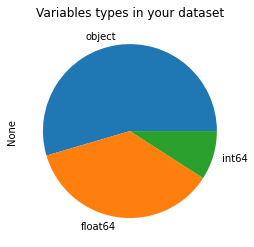

-------------------- MISSING VALUE IN YOUR DATASET --------------------

╭─── Missing value output ────╮
│ magnitude_of_delay    0.000 │
│ delay_in_seconds      0.000 │
│ record_date           0.000 │
│ luminosity            0.000 │
│ avg_temperature       0.000 │
│ avg_atm_pressure      0.000 │
│ avg_humidity          0.000 │
│ avg_wind_speed        0.000 │
│ avg_rain              0.000 │
│ incidents             0.000 │
│ affected_roads        0.017 │
│ dtype: float64              │
╰─────────────────────────────╯

╭─ Missing value counts output ─╮
│ 0.017     1                   │
│ 0.000    10                   │
│ dtype: int64                  │
╰───────────────────────────────╯

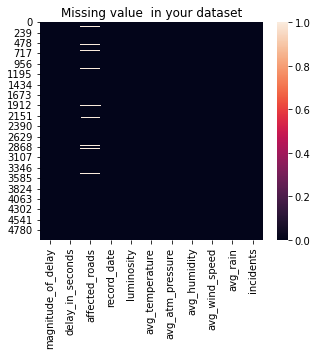

#################### END ####################

In [1928]:
lois_ds_report(trainingData,target_variable="incidents")

In [1929]:
trainingData.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [1930]:
trainingData.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,560.567000,14.583000,1018.145000,74.455000,1.253500
std,1686.859581,4.820514,5.174372,17.204638,1.269847
min,0.000000,1.000000,997.000000,6.000000,0.000000
25%,0.000000,11.000000,1015.000000,63.000000,0.000000
50%,0.000000,14.000000,1019.000000,78.000000,1.000000
75%,234.000000,18.000000,1022.000000,90.000000,2.000000
max,31083.000000,35.000000,1032.000000,100.000000,10.000000


## 4. Data Preprocessing

### Look for any Duplicated Values

In [1931]:
# Is there any duplicated data?
print("Number of duplicated rows: {}".format(trainingData.duplicated().sum()))

Number of duplicated rows: 0


In [1932]:
# Column affected_roads is a list of roads that are affected by the incident.
# Replace this column with the number of roads affected by the incident.
# Iterate over the number of affected roads of each incident.
def replace_affected_roads(data):
    
    for index, row in data.iterrows():
        # Check if the value is NaN
        split_roads = []
        if not pd.isnull(row['affected_roads']):
            split_roads = row['affected_roads'].split(',')
        
        # Remove empty strings
        split_roads = list(filter(None, split_roads))
        
        # Remove duplicates
        split_roads = list(dict.fromkeys(split_roads))
        
        data.at[index, 'affected_roads'] = len(split_roads)
        
    # Rename column
    data['affected_roads'] = data['affected_roads'].astype('int64')
    data.rename(columns={'affected_roads': 'number_of_affected_roads'}, inplace=True)
    
    return data

if 'affected_roads' in trainingData.columns:
    trainingData = replace_affected_roads(trainingData)
if 'affected_roads' in testData.columns:
    testData = replace_affected_roads(testData)

# Checks...
print("Training data:")
print(trainingData['number_of_affected_roads'].head())
print("-----------------------------------------------------------------------")
print("Test data:")
print(testData['number_of_affected_roads'].head())

Training data:
0    0
1    1
2    0
3    3
4    1
Name: number_of_affected_roads, dtype: int64
-----------------------------------------------------------------------
Test data:
0    1
1    1
2    1
3    2
4    1
Name: number_of_affected_roads, dtype: int64


---

<AxesSubplot:>

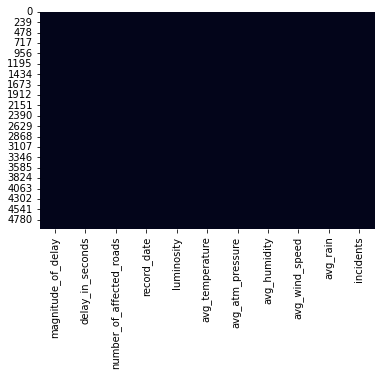

In [1933]:
# Check null values (graphically)
sns.heatmap(trainingData.isnull(), cbar=False)

In [1934]:
# sns.pairplot(trainingData)

In [1935]:
# Before the profile report, let's see the data types we have
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   magnitude_of_delay        5000 non-null   object 
 1   delay_in_seconds          5000 non-null   int64  
 2   number_of_affected_roads  5000 non-null   int64  
 3   record_date               5000 non-null   object 
 4   luminosity                5000 non-null   object 
 5   avg_temperature           5000 non-null   float64
 6   avg_atm_pressure          5000 non-null   float64
 7   avg_humidity              5000 non-null   float64
 8   avg_wind_speed            5000 non-null   float64
 9   avg_rain                  5000 non-null   object 
 10  incidents                 5000 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 429.8+ KB


In [1936]:
# There are 5 non-numeric columns: magnitude_of_delay, record_date, luminosity, avg_rain and incidents
# See the different values of each column - exclude record_date, because it is a date (\:)
non_numeric_columns = ['magnitude_of_delay', 'luminosity', 'avg_rain', 'incidents']
for column in non_numeric_columns:
    print("Column: {}".format(column))
    unique_values_train = trainingData[column].unique()
    
    # Check if the column exists in the test data (incidents does not exist)
    if column in testData.columns:
        unique_values_test = testData[column].unique()
    else:
        unique_values_test = []
    
    # Merge the two arrays and remove duplicates
    unique_values = np.concatenate((unique_values_train, unique_values_test), axis=0)
    unique_values = np.unique(unique_values)
    print(unique_values)
    print("-----------------------------------------------------------------------") 

Column: magnitude_of_delay
['MAJOR' 'MODERATE' 'UNDEFINED']
-----------------------------------------------------------------------
Column: luminosity
['DARK' 'LIGHT' 'LOW_LIGHT']
-----------------------------------------------------------------------
Column: avg_rain
['Sem Chuva' 'chuva forte' 'chuva fraca' 'chuva moderada']
-----------------------------------------------------------------------
Column: incidents
['High' 'Low' 'Medium' 'None' 'Very_High']
-----------------------------------------------------------------------


# Encode Categorical Values

In [1937]:
# For the 'magnitude_of_delay', 'luminosity' and 'avg_rain' - let's encode the values

# Check if the column type is object
if trainingData['magnitude_of_delay'].dtype == 'object':
    dict_magnitude_of_delay = {'UNDEFINED': 0, 'MODERATE':1, 'MAJOR':2}
    trainingData['magnitude_of_delay'] = trainingData['magnitude_of_delay'].map(dict_magnitude_of_delay)
    testData['magnitude_of_delay'] = testData['magnitude_of_delay'].map(dict_magnitude_of_delay)

if trainingData['luminosity'].dtype == 'object':
    dict_luminosity = {'DARK':0, 'LOW_LIGHT': 1, 'LIGHT':2}
    trainingData['luminosity'] = trainingData['luminosity'].map(dict_luminosity)
    testData['luminosity'] = testData['luminosity'].map(dict_luminosity)

if trainingData['avg_rain'].dtype == 'object':
    dict_avg_rain = {'Sem Chuva': 0, 'chuva fraca': 1, 'chuva moderada': 2, 'chuva forte': 3}
    trainingData['avg_rain'] = trainingData['avg_rain'].map(dict_avg_rain)
    testData['avg_rain'] = testData['avg_rain'].map(dict_avg_rain)

In [1938]:
trainingData.head()

,magnitude_of_delay,delay_in_seconds,number_of_affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,0,0,0,2021-03-15 23:00,0,12.0,1013.0,70.0,1.0,0,None
1,0,385,1,2021-12-25 18:00,0,12.0,1007.0,91.0,1.0,0,None
2,0,69,0,2021-03-12 15:00,2,14.0,1025.0,64.0,0.0,0,Low
3,2,2297,3,2021-09-29 09:00,2,15.0,1028.0,75.0,1.0,0,Very_High
4,0,0,1,2021-06-13 11:00,2,27.0,1020.0,52.0,1.0,0,High


In [1939]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   magnitude_of_delay        5000 non-null   int64  
 1   delay_in_seconds          5000 non-null   int64  
 2   number_of_affected_roads  5000 non-null   int64  
 3   record_date               5000 non-null   object 
 4   luminosity                5000 non-null   int64  
 5   avg_temperature           5000 non-null   float64
 6   avg_atm_pressure          5000 non-null   float64
 7   avg_humidity              5000 non-null   float64
 8   avg_wind_speed            5000 non-null   float64
 9   avg_rain                  5000 non-null   int64  
 10  incidents                 5000 non-null   object 
dtypes: float64(4), int64(5), object(2)
memory usage: 429.8+ KB


#### Time of day

In [1940]:
# Turn column record_date into manha,tarde,noite or madrugada
def turn_date_into_time_of_day(record_date):
    hour = int(record_date.split(' ')[1].split(':')[0])
    if hour >= 6 and hour < 12:
        return 'manha'
    elif hour >= 12 and hour < 18:
        return 'tarde'
    elif hour >= 18 and hour < 24:
        return 'noite'
    else:
        return 'madrugada'

def turn_month_into_season(record_date):
    month = int(record_date.split(' ')[0].split('-')[1])
    if month >= 3 and month < 6:
        return 'primavera'
    elif month >= 6 and month < 9:
        return 'verao'
    elif month >= 9 and month < 12:
        return 'outono'
    else:
        return 'inverno'

if 'record_date' in trainingData.columns:
    trainingData['time_of_day'] = trainingData['record_date'].apply(turn_date_into_time_of_day)
    testData['time_of_day'] = testData['record_date'].apply(turn_date_into_time_of_day)
    # 
    dict_time_of_day = {'manha': 1, 'tarde':2, 'noite':3, 'madrugada':4}
    trainingData['time_of_day'] = trainingData['time_of_day'].map(dict_time_of_day)
    testData['time_of_day'] = testData['time_of_day'].map(dict_time_of_day)
    #
    trainingData['month'] = trainingData['record_date'].apply(turn_month_into_season)
    testData['month'] = testData['record_date'].apply(turn_month_into_season)
    #
    dict_season = {'inverno': 1, 'outono':2, 'primavera':3, 'verao':4}
    trainingData['month'] = trainingData['month'].map(dict_season)
    testData['month'] = testData['month'].map(dict_season)
    
    # Drop record_date
    trainingData.drop('record_date', axis=1, inplace=True)
    testData.drop('record_date', axis=1, inplace=True)

<AxesSubplot:>

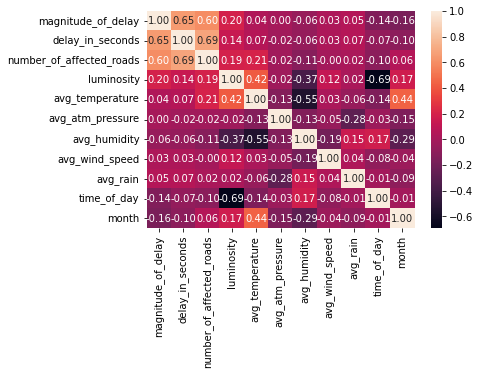

In [1941]:
sns.heatmap(trainingData.corr(), annot=True, fmt='.2f')

In [1942]:
# Check unique values of the dataset.
print("Unique values of the dataset:")
print(trainingData.nunique())

Unique values of the dataset:
magnitude_of_delay             3
delay_in_seconds            1186
number_of_affected_roads       9
luminosity                     3
avg_temperature               35
avg_atm_pressure              36
avg_humidity                  83
avg_wind_speed                11
avg_rain                       4
incidents                      5
time_of_day                    4
month                          4
dtype: int64


In [1943]:
# Get the profile report - later analyze the results
# trainingData.profile_report()

<AxesSubplot:>

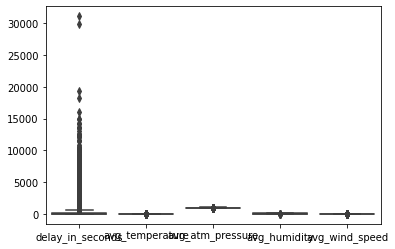

In [1944]:
# Visualyze outliers of the dataset: all columns
outliers_columns = ['delay_in_seconds', 'avg_temperature', 'avg_atm_pressure', 'avg_humidity', 'avg_wind_speed']
sns.boxplot(data=trainingData[outliers_columns])

In [1945]:
# Describe outliers columns
trainingData[outliers_columns].describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,560.567000,14.583000,1018.145000,74.455000,1.253500
std,1686.859581,4.820514,5.174372,17.204638,1.269847
min,0.000000,1.000000,997.000000,6.000000,0.000000
25%,0.000000,11.000000,1015.000000,63.000000,0.000000
50%,0.000000,14.000000,1019.000000,78.000000,1.000000
75%,234.000000,18.000000,1022.000000,90.000000,2.000000
max,31083.000000,35.000000,1032.000000,100.000000,10.000000


In [1946]:
# Count the number of outliers per column with the IQR method; have an option to remove the outliers
def count_outliers_IQR(data, column, remove_outliers=False, verbose=False):
    # Calculate the 1st and 3rd quartile
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    # Calculate the IQR
    IQR = q3 - q1
    # Calculate the lower and upper bound
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    # Count the number of outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    if verbose:
        print("Number of outliers for column {} is {}".format(column, outliers.shape[0]))
    # Remove the outliers
    if remove_outliers:
        number_of_rows_before = data.shape[0]
        data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
        print("Removed {} rows from the dataset".format(number_of_rows_before - data.shape[0]))
    return data

In [1947]:
# Count the number of outliers per column with the Z-score method; have an option to remove the outliers
def count_outliers_Z_score(data, column, remove_outliers=False, verbose=False):
    # Calculate the Z-score
    z = np.abs(stats.zscore(data[column]))
    # Count the number of outliers
    outliers = data[z > 3]
    if verbose:
        print("Number of outliers for column {} is {}".format(column, outliers.shape[0]))
    # Remove the outliers
    if remove_outliers:
        number_of_rows_before = data.shape[0]
        data = data[z < 3]
        print("Removed {} rows from the dataset".format(number_of_rows_before - data.shape[0]))
    return data

In [1948]:
# Count and compare the number of outliers per column; do not remove the outliers
for column in outliers_columns:
    trainingData = count_outliers_IQR(trainingData, column, verbose=True)
    trainingData = count_outliers_Z_score(trainingData, column, verbose=True)
    print()

Number of outliers for column delay_in_seconds is 884
Number of outliers for column delay_in_seconds is 117

Number of outliers for column avg_temperature is 43
Number of outliers for column avg_temperature is 33

Number of outliers for column avg_atm_pressure is 45
Number of outliers for column avg_atm_pressure is 19

Number of outliers for column avg_humidity is 9
Number of outliers for column avg_humidity is 9

Number of outliers for column avg_wind_speed is 44
Number of outliers for column avg_wind_speed is 44



In [1949]:
# Plot a histogram of the outliers columns
# trainingData[outliers_columns].hist(figsize=(10,10))


In [1950]:
# Remove the outliers with the IQR method
#for column in outliers_columns:
#    # trainingData = count_outliers_IQR(trainingData, column, remove_outliers=True)
#    trainingData = count_outliers_Z_score(trainingData, column, remove_outliers=True)

# Replace the outliers
for column in outliers_columns:
    # Calculate the maximum and minimum values that are not outliers
    # According to the z-score method
    max_value = trainingData[column].mean() + 3 * trainingData[column].std()
    min_value = trainingData[column].mean() - 3 * trainingData[column].std()
        
    # Replace the outliers with the maximum and minimum values
    trainingData.loc[trainingData[column] > max_value, column] = max_value
    trainingData.loc[trainingData[column] < min_value, column] = min_value


In [1951]:
# Columns to be scaled
# scaled_columns = ['delay_in_seconds', 'avg_temperature', 'avg_atm_pressure', 'avg_humidity', 'avg_wind_speed']
scaled_columns = ['avg_temperature', 'avg_atm_pressure', 'avg_humidity', 'avg_wind_speed']

# Normalize the scaled columns
scaler = MinMaxScaler()
trainingData[scaled_columns] = scaler.fit_transform(trainingData[scaled_columns])

# Multiply the 'delay_in_seconds' column by the 'magnitude_of_delay' column
# Sum the 'delay_in_seconds' column with the 'magnitude_of_delay' column
#trainingData['magnitude_of_delay'] = trainingData['delay_in_seconds'] * trainingData['magnitude_of_delay']
#trainingData['magnitude_of_delay'] = trainingData['delay_in_seconds'] + trainingData['magnitude_of_delay']

# Remove column 'delay_in_seconds' from the dataset
#if 'delay_in_seconds' in trainingData.columns:
#    trainingData.drop('delay_in_seconds', axis=1, inplace=True)
#    testData.drop('delay_in_seconds', axis=1, inplace=True)

In [1952]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   magnitude_of_delay        5000 non-null   int64  
 1   delay_in_seconds          5000 non-null   float64
 2   number_of_affected_roads  5000 non-null   int64  
 3   luminosity                5000 non-null   int64  
 4   avg_temperature           5000 non-null   float64
 5   avg_atm_pressure          5000 non-null   float64
 6   avg_humidity              5000 non-null   float64
 7   avg_wind_speed            5000 non-null   float64
 8   avg_rain                  5000 non-null   int64  
 9   incidents                 5000 non-null   object 
 10  time_of_day               5000 non-null   int64  
 11  month                     5000 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 468.9+ KB


## 5. Models Training

In [1953]:
""" Save results to a file. """
def saveResults ( results, path ):
    file = open(path, 'w')
    file.write ("RowId,Incidents\n")
    i = 1
    for result in results :
        file.write (str(i) + "," + result + "\n")
        i += 1

In [1954]:
# run for test or run for submission
results_to_test = True

# FOR NEURAL NETWORKS
# Make dictionary for incident types
dict_incident_types = {'High': 0, 'Low': 1, 'Medium': 2, 'Very High': 3, 'None': 4}
# Convert the incident types to numbers
trainingData['incidents'] = trainingData['incidents'].map(dict_incident_types)

# split data into train and test
trainData = trainingData.copy()
ttData = testData.copy()

if results_to_test:
    y = trainData['incidents']
    x = trainData.drop(['incidents'], axis=1)
    x_training, x_testing, y_training, y_testing = model_selection.train_test_split(x, y, test_size=0.5, random_state=2022)

else :
    x_testing = ttData.drop(['record_date'], axis=1) # TODO REMOVER
    y_training = trainData['incidents'] 
    x_training = trainData.drop(['record_date','incidents','number_affected_roads'], axis=1)


In [1959]:
# neural network
import torch
import torch.nn as nn

# Define the model architecture
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Determine the input size based on the number of features in the dataset
num_features = x_training.shape[1]

# Create an instance of the model
model = Net(input_size=num_features, hidden_size=256, num_classes=5)  # High, Low, Medium, Very High, None

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Convert the data to tensors
X_train = torch.tensor(x_training.values, dtype=torch.float32)
y_train = torch.tensor(y_training.values, dtype=torch.long)
X_test = torch.tensor(x_testing.values, dtype=torch.float32)
y_test = torch.tensor(y_testing.values, dtype=torch.long)

# Create a dataloader for the training data
train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)

# Train the model
for epoch in range(100):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print('Epoch {} Loss: {}'.format(epoch, loss.item()))

# Test the model
with torch.no_grad():
    y_pred = model(X_test)
    loss = criterion(y_pred, y_test)
    print('Test Loss: {}'.format(loss.item()))

# Get the predictions
_, predicted = torch.max(y_pred.data, 1)

print('Accuracy: {}%'.format(100 * torch.sum(predicted == y_test.data) / len(y_test)))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ <ipython-input-1959-0483564fac44>:44 in <module>                                                 │
│                                                                                                  │
│ /home/rubensas/anaconda3/envs/DAA/lib/python3.6/site-packages/torch/nn/modules/module.py:1102 in │
│ _call_impl                                                                                       │
│                                                                                                  │
│   1099 │   │   # this function, and just call forward.                                           │
│   1100 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1101 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1102 │   │   │   return forward_call(*input, **kwargs)                                         │
│   1103 │   │   # Do not call functions when jit is used                                          │
│   1104 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1105 │   │   if self._backward_hooks or _global_backward_hooks:                                │
│                                                                                                  │
│ /home/rubensas/anaconda3/envs/DAA/lib/python3.6/site-packages/torch/nn/modules/loss.py:1152 in   │
│ forward                                                                                          │
│                                                                                                  │
│   1149 │   def forward(self, input: Tensor, target: Tensor) -> Tensor:                           │
│   1150 │   │   return F.cross_entropy(input, target, weight=self.weight,                         │
│   1151 │   │   │   │   │   │   │      ignore_index=self.ignore_index, reduction=self.reduction,  │
│ ❱ 1152 │   │   │   │   │   │   │      label_smoothing=self.label_smoothing)                      │
│   1153                                                                                           │
│   1154                                                                                           │
│   1155 class MultiLabelSoftMarginLoss(_WeightedLoss):                                            │
│                                                                                                  │
│ /home/rubensas/anaconda3/envs/DAA/lib/python3.6/site-packages/torch/nn/functional.py:2846 in     │
│ cross_entropy                                                                                    │
│                                                                                                  │
│   2843 │   │   )                                                                                 │
│   2844 │   if size_average is not None or reduce is not None:                                    │
│   2845 │   │   reduction = _Reduction.legacy_get_string(size_average, reduce)                    │
│ ❱ 2846 │   return torch._C._nn.cross_entropy_loss(input, target, weight, _Reduction.get_enum(re  │
│   2847                                                                                           │
│   2848                                                                                           │
│   2849 def binary_cross_entropy(                                                                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: Target -9223372036854775808 is out of bounds.

In [1831]:
# xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(max_depth=25, n_estimators=500, learning_rate=0.1)
model.fit(x_training, y_training)

predictions = model.predict(x_testing)

print("Accuracy: ", accuracy_score(y_testing, predictions))

/home/rubensas/anaconda3/envs/DAA/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.8028


### 5.8 RandomForestClassifier

In [1770]:
# Random Forest Classifier tunning

#model = RandomForestClassifier(random_state=2022)
#
#param_grid = {
#    'n_estimators': [500, 750, 1000],
#    'max_depth': [15, 25, 35],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 5]
#}
#
## change cv later? use square root of dataset size ?
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=3)
#grid_search.fit(x_training, y_training)
#print(grid_search.best_params_)
#print(grid_search.best_score_)
#
random_forest = RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=500, random_state=2022)
random_forest.fit(x_training, y_training)
random_forest_predictions = random_forest.predict(x_testing)

# print accuracy
print("Random Forest Classifier Accuracy: ", metrics.accuracy_score(y_testing, random_forest_predictions))

Random Forest Classifier Accuracy:  0.7968


### 5.1 Regressão Logística

In [1450]:
logmodel = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logmodel.fit(x_training,y_training)
logistic_regression_predictions = logmodel.predict(x_testing)

### 5.2 Árvores de Decisão e Classificação

In [1451]:
dtc = tree.DecisionTreeClassifier(random_state=2022, criterion="gini", max_depth=10)
dtc.fit(x_training,y_training)
decision_trees_predictions = dtc.predict(x_testing)

### 5.3 Maquinas de Vectores de Suporte (SVM)

In [1452]:
df_feat = pd.DataFrame(x_training, columns=x_training.columns)
df_target = pd.DataFrame(y_training, columns=['incidents'])

# 10-Fold Cross Validation
cross_valid_model = SVC(random_state=2022)
cross_val_score(cross_valid_model, df_feat, np.ravel(df_target), cv=10)

array([0.524, 0.592, 0.524, 0.592, 0.556, 0.548, 0.548, 0.552, 0.628,
       0.552])

### 5.4 Hold-out

In [1453]:
model = SVC(random_state=2022)
model.fit(x_training, y_training)
hold_out_predictions = model.predict(x_testing)

### 5.5 Grid Search

In [1454]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
# grid = GridSearchCV(SVC(random_state=2022), param_grid, refit=True, verbose=3)
# grid.fit(x_training, y_training)
# grid_predictions = grid.predict(x_testing)

### 5.6 KNeighborsClassifier

In [1455]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_training, y_training)
knn_predictions = knn.predict(x_testing)

### 5.7 GaussianProcessClassifier

In [1456]:
# gaussian = GaussianProcessClassifier(n_restarts_optimizer=0, max_iter_predict=100, random_state=2022)
# gaussian.fit(x_training, y_training)
# gaussian_predictions = gaussian.predict(x_testing)

### 5.9 MLPClassifier

In [1458]:
mlpclass = MLPClassifier(alpha=1, max_iter=1000)
mlpclass.fit(x_training, y_training)
mlpclass_predictions = mlpclass.predict(x_testing)

### 5.10 AdaBoostClassifier

In [1459]:
adaBoost = AdaBoostClassifier(n_estimators=100, random_state=2022)
adaBoost.fit(x_training, y_training)
adaBoost_predictions = adaBoost.predict(x_testing)

### 5.11 GaussianNB

In [1460]:
gaussianNB = GaussianNB()
gaussianNB.fit(x_training, y_training)
gaussianNB_predictions = gaussianNB.predict(x_testing)

### 5.12 QuadraticDiscriminantAnalysis

In [1461]:
quadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()
quadraticDiscriminantAnalysis.fit(x_training, y_training)
quadraticDiscriminantAnalysis_predictions = quadraticDiscriminantAnalysis.predict(x_testing)

## 6. Model Evaluation

In [1462]:
if results_to_test:

    results = []
    results_table = []

    # 5.1 Regressão Logística
    logistic_regression_classification = metrics.classification_report(y_testing, logistic_regression_predictions, zero_division=0)
    logistic_regression_classification_dict = metrics.classification_report(y_testing, logistic_regression_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Regressão Logística', 'table': logistic_regression_classification})
    results.append({
        'model': 'Regressão Logística',
        'accuracy': logistic_regression_classification_dict['accuracy'],
        'precision': logistic_regression_classification_dict['macro avg']['precision'],
        'recall': logistic_regression_classification_dict['macro avg']['recall'],
        'f1-score': logistic_regression_classification_dict['macro avg']['f1-score'],
        })

    # 5.2 Decision Tree
    decision_trees_classification = metrics.classification_report(y_testing, decision_trees_predictions, zero_division=0)
    decision_trees_classification_dict = metrics.classification_report(y_testing, decision_trees_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Decision Tree', 'table': decision_trees_classification})
    results.append({
        'model': 'Decision Tree',
        'accuracy': decision_trees_classification_dict['accuracy'],
        'precision': decision_trees_classification_dict['macro avg']['precision'],
        'recall': decision_trees_classification_dict['macro avg']['recall'],
        'f1-score': decision_trees_classification_dict['macro avg']['f1-score']
        })

    # 5.4 Hold Out
    hold_out_classification = metrics.classification_report(y_testing, hold_out_predictions, zero_division=0)
    hold_out_classification_dict = metrics.classification_report(y_testing, hold_out_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Hold Out', 'table': hold_out_classification})
    results.append({
        'model': 'Hold Out',
        'accuracy': hold_out_classification_dict['accuracy'],
        'precision': hold_out_classification_dict['macro avg']['precision'],
        'recall': hold_out_classification_dict['macro avg']['recall'],
        'f1-score': hold_out_classification_dict['macro avg']['f1-score']
        })

    # 5.5 Grid Search
    #grid_classification = metrics.classification_report(y_testing, grid_predictions, zero_division=0)
    #grid_classification_dict = metrics.classification_report(y_testing, grid_predictions, output_dict=True, zero_division=0)
    #results_table.append({'model': 'Grid Search', 'table': grid_classification})
    #results.append({
    #    'model': 'Grid Search',
    #    'accuracy': grid_classification_dict['accuracy'],
    #    'precision': grid_classification_dict['macro avg']['precision'],
    #    'recall': grid_classification_dict['macro avg']['recall'],
    #    'f1-score': grid_classification_dict['macro avg']['f1-score']
    #    })

    #  5.6 KNN
    knn_classification = metrics.classification_report(y_testing, knn_predictions, zero_division=0)
    knn_classification_dict = metrics.classification_report(y_testing, knn_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'KNN', 'table': knn_classification})
    results.append({
        'model': 'KNN',
        'accuracy': knn_classification_dict['accuracy'],
        'precision': knn_classification_dict['macro avg']['precision'],
        'recall': knn_classification_dict['macro avg']['recall'],
        'f1-score': knn_classification_dict['macro avg']['f1-score']
        })

    # 5.7 Gaussian
    #gaussian_classification = metrics.classification_report(y_testing, gaussian_predictions, zero_division=0)
    #gaussian_classification_dict = metrics.classification_report(y_testing, gaussian_predictions, output_dict=True, zero_division=0)
    #results_table.append({'model': 'Gaussian', 'table': gaussian_classification})
    #results.append({
    #    'model': 'Gaussian',
    #    'accuracy': gaussian_classification_dict['accuracy'],
    #    'precision': gaussian_classification_dict['macro avg']['precision'],
    #    'recall': gaussian_classification_dict['macro avg']['recall'],
    #    'f1-score': gaussian_classification_dict['macro avg']['f1-score']
    #    })

    # 5.8 Random Forest
    random_forest_classification = metrics.classification_report(y_testing, random_forest_predictions, zero_division=0)
    random_forest_classification_dict = metrics.classification_report(y_testing, random_forest_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Random Forest', 'table': random_forest_classification})
    results.append({
        'model': 'Random Forest',
        'accuracy': random_forest_classification_dict['accuracy'],
        'precision': random_forest_classification_dict['macro avg']['precision'],
        'recall': random_forest_classification_dict['macro avg']['recall'],
        'f1-score': random_forest_classification_dict['macro avg']['f1-score']
        })

    # 5.9 MLP
    mlp_classification = metrics.classification_report(y_testing, mlpclass_predictions, zero_division=0)
    mlp_classification_dict = metrics.classification_report(y_testing, mlpclass_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'MLP', 'table': mlp_classification})
    results.append({
        'model': 'MLP',
        'accuracy': mlp_classification_dict['accuracy'],
        'precision': mlp_classification_dict['macro avg']['precision'],
        'recall': mlp_classification_dict['macro avg']['recall'],
        'f1-score': mlp_classification_dict['macro avg']['f1-score']
        })
    
    # 5.10 AdaBoost
    adaBoost_classification = metrics.classification_report(y_testing, adaBoost_predictions, zero_division=0)
    adaBoost_classification_dict = metrics.classification_report(y_testing, adaBoost_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'AdaBoost', 'table': adaBoost_classification})
    results.append({
        'model': 'AdaBoost',
        'accuracy': adaBoost_classification_dict['accuracy'],
        'precision': adaBoost_classification_dict['macro avg']['precision'],
        'recall': adaBoost_classification_dict['macro avg']['recall'],
        'f1-score': adaBoost_classification_dict['macro avg']['f1-score']
        })

    # 5.11 GaussianNB
    gaussianNB_classification = metrics.classification_report(y_testing, gaussianNB_predictions, zero_division=0)
    gaussianNB_classification_dict = metrics.classification_report(y_testing, gaussianNB_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'GaussianNB', 'table': gaussianNB_classification})
    results.append({
        'model': 'GaussianNB',
        'accuracy': gaussianNB_classification_dict['accuracy'],
        'precision': gaussianNB_classification_dict['macro avg']['precision'],
        'recall': gaussianNB_classification_dict['macro avg']['recall'],
        'f1-score': gaussianNB_classification_dict['macro avg']['f1-score']
        })
    
    # 5.12 Quadratic Discriminant Analysis
    qda_classification = metrics.classification_report(y_testing, quadraticDiscriminantAnalysis_predictions, zero_division=0)
    qda_classification_dict = metrics.classification_report(y_testing, quadraticDiscriminantAnalysis_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Quadratic Discriminant Analysis', 'table': qda_classification})
    results.append({
        'model': 'Quadratic Discriminant Analysis',
        'accuracy': qda_classification_dict['accuracy'],
        'precision': qda_classification_dict['macro avg']['precision'],
        'recall': qda_classification_dict['macro avg']['recall'],
        'f1-score': qda_classification_dict['macro avg']['f1-score']
        })

else:
    saveResults(logistic_regression_predictions, 'results/logisticRegression.csv')
    saveResults(decision_trees_predictions, 'results/classificationDecisionTree.csv')
    saveResults(hold_out_predictions, 'results/Hold-Out-SVN.csv')
    # saveResults(grid_predictions, 'results/GridSearchCV.csv')
    saveResults(knn_predictions, 'results/KNN.csv')
    # saveResults(gaussian_predictions, 'results/Gaussian.csv')
    saveResults(random_forest_predictions, 'results/RandomForest.csv')
    saveResults(mlpclass_predictions, 'results/MLP.csv')
    saveResults(adaBoost_predictions, 'results/AdaBoost.csv')
    saveResults(gaussianNB_predictions, 'results/GaussianNB.csv')
    saveResults(quadraticDiscriminantAnalysis_predictions, 'results/QuadraticDiscriminantAnalysis.csv')


In [1463]:
for result in results_table:
    print("----------" + result['model'] + "----------------------------------------------------------------")
    print(result['table'])

----------Regressão Logística----------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.44      0.36      0.39       544
         Low       0.51      0.28      0.36       363
      Medium       0.75      0.01      0.02       282
        None       0.61      0.93      0.73      1014
   Very_High       0.73      0.73      0.73       297

    accuracy                           0.58      2500
   macro avg       0.61      0.46      0.45      2500
weighted avg       0.59      0.58      0.53      2500

----------Decision Tree----------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.66      0.71      0.69       544
         Low       0.69      0.64      0.66       363
      Medium       0.65      0.55      0.59       282
        None       0.85      0.90      0.87      1014
   Very_High       0.82      0.74      0.78       297

   

In [1464]:
results_plot = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for row in results:
    results_plot = results_plot.append({
        'Model': row['model'],
        'Accuracy': row['accuracy'],
        'Precision': row['precision'],
        'Recall': row['recall'],
        'F1-Score': row['f1-score']
        }, ignore_index=True)

Text(0, 0.5, 'Accuracy')

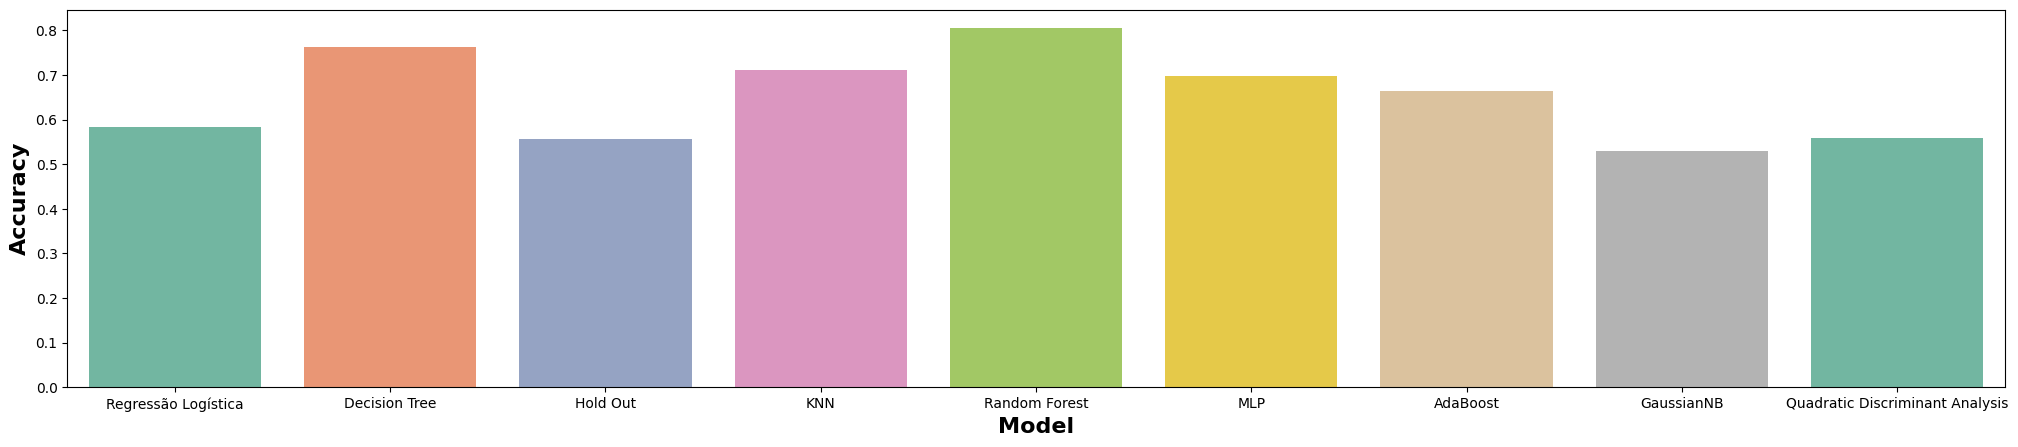

In [1465]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Accuracy'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Accuracy', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'Precision')

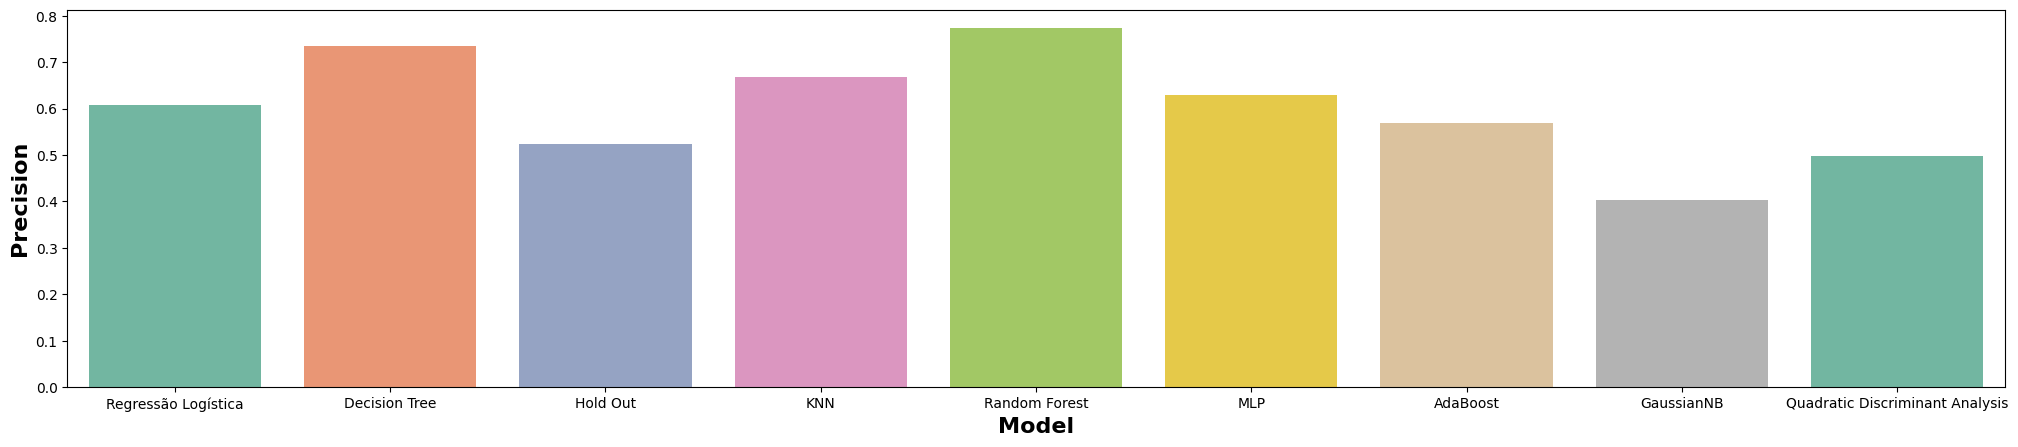

In [1466]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Precision'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Precision', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'Recall')

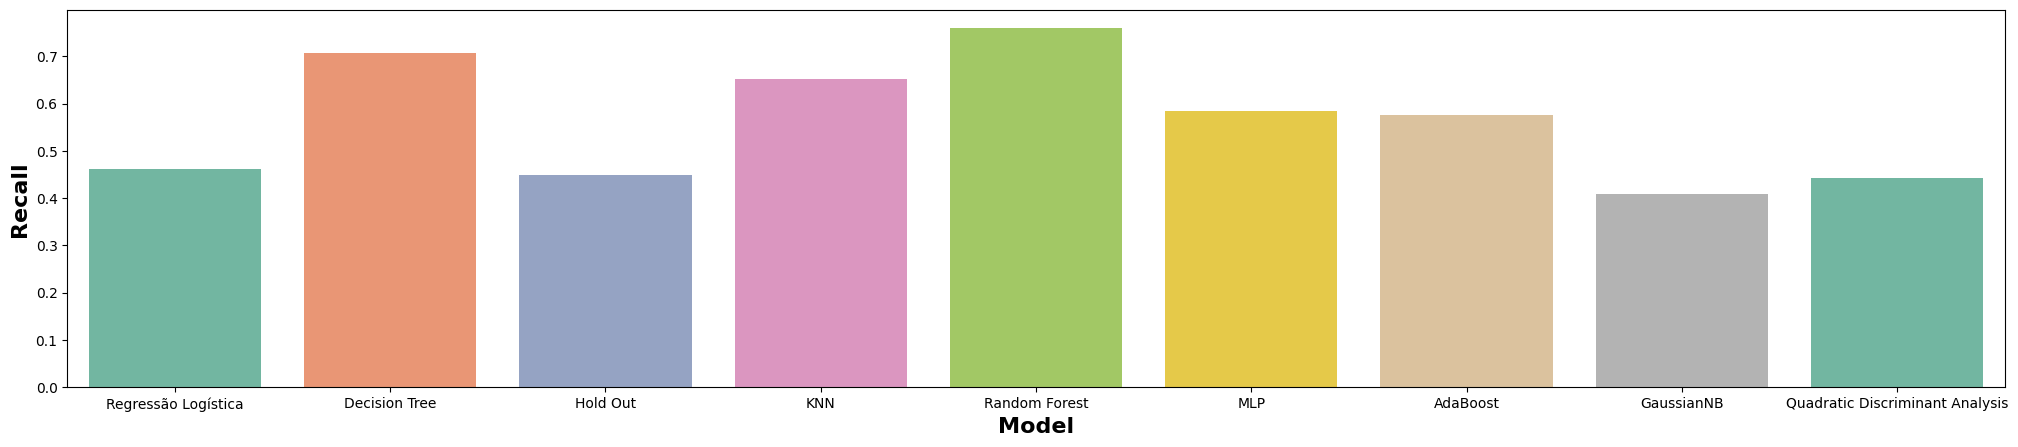

In [1467]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Recall'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Recall', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'F1-Score')

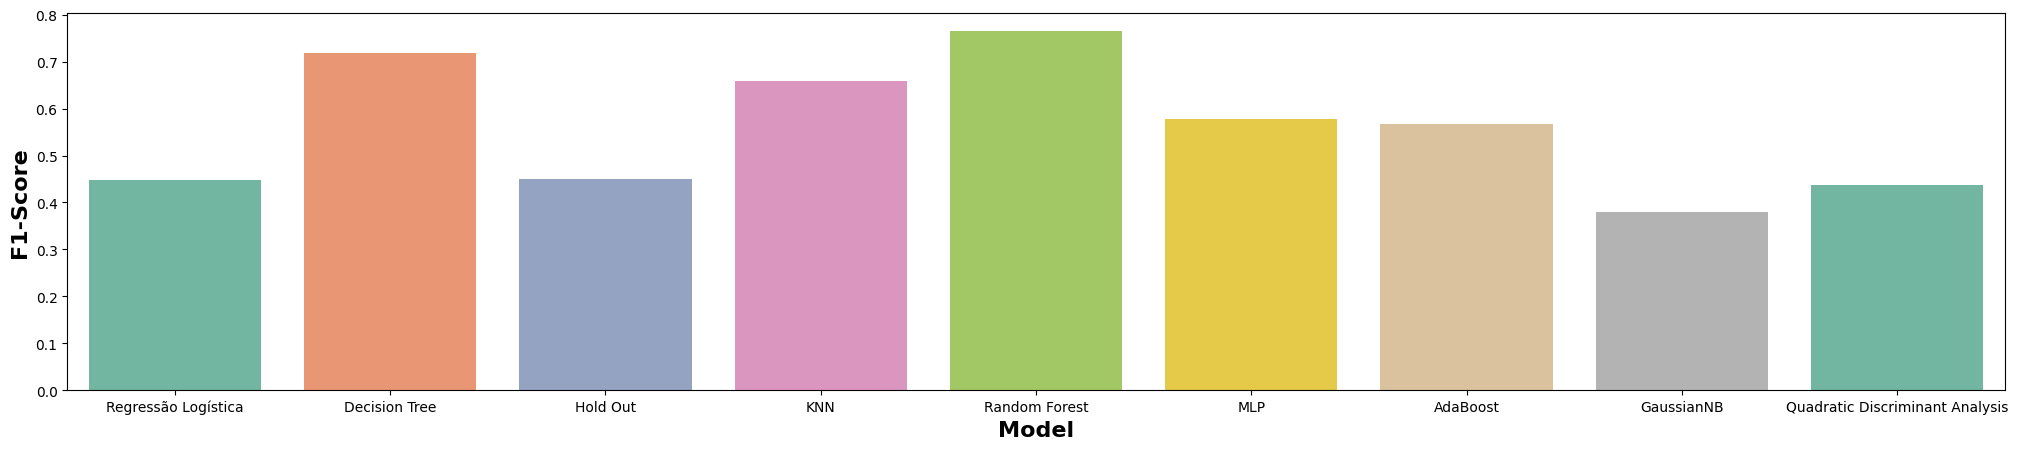

In [1468]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['F1-Score'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('F1-Score', fontdict={'color':'black', 'weight':'bold', 'size': 16})